# Regression Tests

The `gold_standard_data` directory contains landmark files and comparisons created using commit 6828ae2084eeace3a21210e195c91de76c194923

The following tests regress against the output of the tools at that commit.


In [1]:
BUILD_DIR="../build/"
!echo $BUILD_DIR

PYTHON_SCRIPT_DIR="../scripts/python/landmark_tools/"
!echo $PYTHON_SCRIPT_DIR

!rm -r output
!mkdir output

../build/
../scripts/python/landmark_tools/


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# This sys call is needed because the file is in another directory 
import sys
sys.path.insert(1, '../scripts/python/landmark_tools')
import visualize_corr
import landmark

plt.rcParams['figure.figsize'] = [8, 3]

## `create_landmark`

Updates have changed the bilinear interpolation method, so some small differences in value are expected

### GEOGRAPHIC projection

In [3]:
!$BUILD_DIR/create_landmark -projection GEOGRAPHIC -planet Earth -nodata_value -999999 -config_file make_equal_rectangular_lmk.txt

Creating landmark with empty surface reflectance map.
 0.954031326135386 -0.299706904745881  0.000000000000000
 0.210253812203645  0.669282956457006  0.712638518921061
-0.213582684708520 -0.679879471261417  0.701531425775066


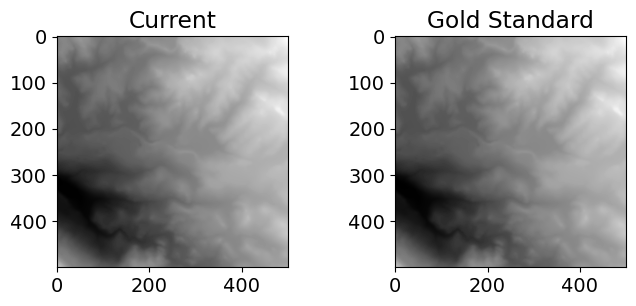

<Figure size 800x300 with 0 Axes>

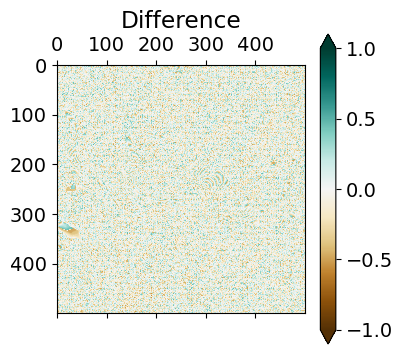

In [4]:
L1 = landmark.Landmark("output/equal_rectangular_WY.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/equal_rectangular_WY.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [5]:
!$BUILD_DIR/create_landmark \
  -geotif_file gold_standard_data/equal_rectangular_WY.tif \
  -lmk_file output/equal_rectangular_WY_geotif.lmk \
  -lmk_width_meters 5000 \
  -lmk_height_meters 5000 \
  -lmk_res 10 \
  -lmk_center_lat 44.55 \
  -lmk_center_long -107.44 \
  -planet Earth

Geographic coordinate system detected
Creating landmark with empty surface reflectance map.
 0.954031313361742 -0.299706945407127  0.000000000000000
 0.210253837876981  0.669282938442665  0.712638528264892
-0.213582716485701 -0.679879471072734  0.701531416283297


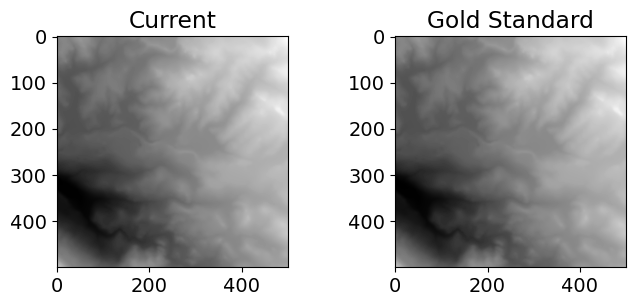

<Figure size 800x300 with 0 Axes>

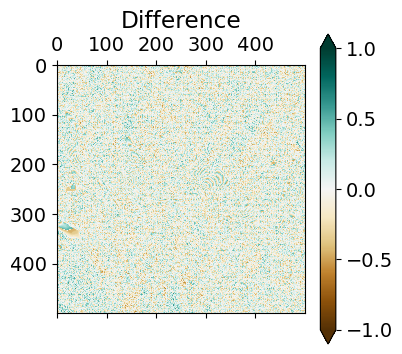

In [6]:
L1 = landmark.Landmark("output/equal_rectangular_WY_geotif.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/equal_rectangular_WY.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

### UTM

In [7]:
!$BUILD_DIR/create_landmark -projection UTM -planet Earth -config_file make_UTM_lmk.txt -nodata_value -999999

Creating landmark with empty surface reflectance map.
 0.954031326133928 -0.299706904750523  0.000000000000000
 0.210253812204625  0.669282956453149  0.712638518924394
-0.213582684712827 -0.679879471263558  0.701531425771680


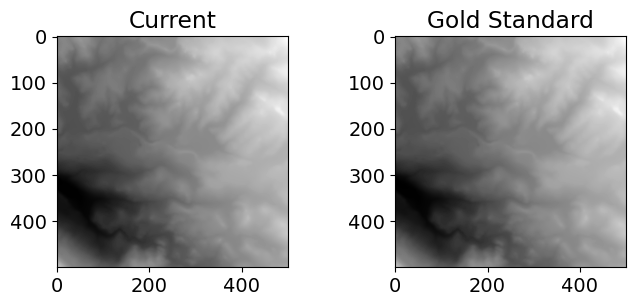

<Figure size 800x300 with 0 Axes>

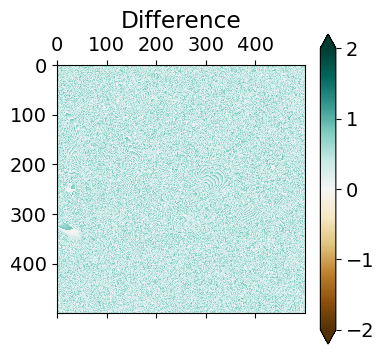

In [8]:
L1 = landmark.Landmark("output/UTM_WY.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/UTM_WY.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-2, vmax=2)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [9]:
!$BUILD_DIR/create_landmark \
  -geotif_file gold_standard_data/UTM_WY.tif \
  -lmk_file output/UTM_WY_geotif.lmk \
  -lmk_width_meters 5000 \
  -lmk_height_meters 5000 \
  -lmk_res 10 \
  -lmk_center_lat 44.55 \
  -lmk_center_long -107.44 \
  -planet Earth

UTM Projection Detected
Creating landmark with empty surface reflectance map.
 0.954031313363096 -0.299706945402814  0.000000000000000
 0.210253837877086  0.669282938441171  0.712638528266264
-0.213582716483039 -0.679879471075008  0.701531416281903


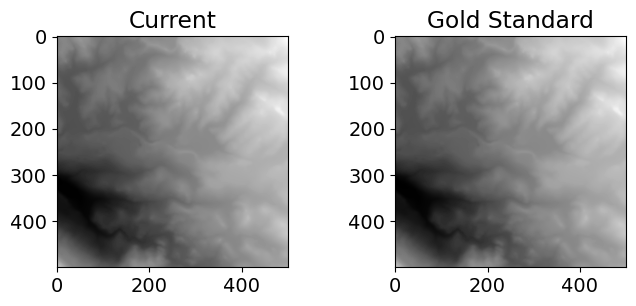

<Figure size 800x300 with 0 Axes>

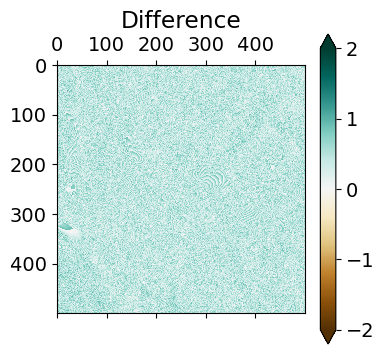

In [10]:
L1 = landmark.Landmark("output/UTM_WY_geotif.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/UTM_WY.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-2, vmax=2)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

### Polar stereographic

In [11]:
!$BUILD_DIR/create_landmark -projection STEREO -config_file make_polar_stereo_lmk.txt

Creating landmark with empty surface reflectance map.
 0.576432273385650 -0.817144928516020  0.000000000000000
-0.817111275614786 -0.576408533875725  0.009075535158606
-0.007416027528424 -0.005231431363667 -0.999958816482751


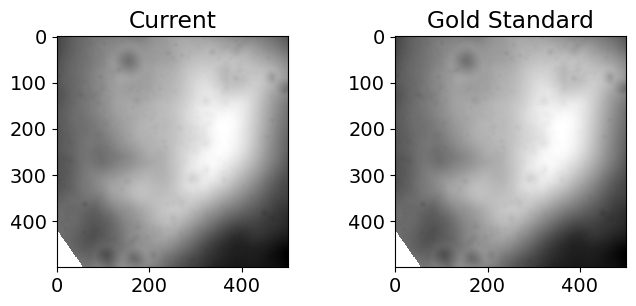

<Figure size 800x300 with 0 Axes>

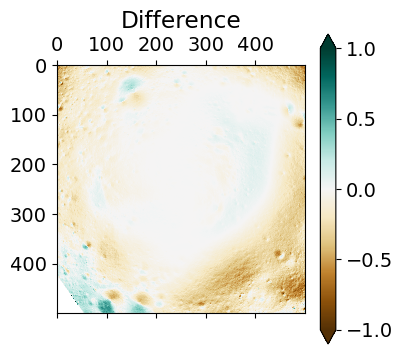

In [12]:
L1 = landmark.Landmark("output/polarstereo_moon.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/polarstereo_moon.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

In [13]:
!$BUILD_DIR/create_landmark \
  -geotif_file gold_standard_data/polarstereo_moon.tif \
  -lmk_file output/polarstereo_moon_geotif.lmk \
  -lmk_width_meters 10000 \
  -lmk_height_meters 10000 \
  -lmk_res 20 \
  -lmk_center_lat -89.480003 \
  -lmk_center_long 215.199997 \
  -planet Moon

Polar Stereographic Projection Detected
Creating landmark with empty surface reflectance map.
 0.576432272646310 -0.817144929037567  0.000000000000000
-0.817111276181661 -0.576408533170154  0.009075528932699
-0.007416022445688 -0.005231427768143 -0.999958816539257


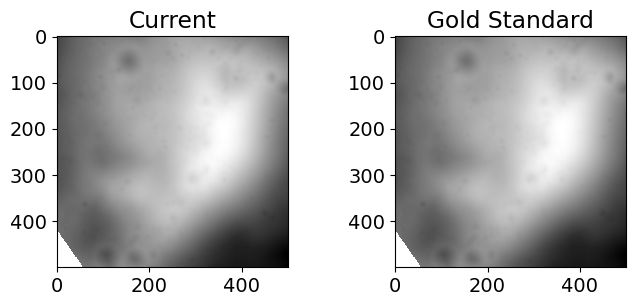

<Figure size 800x300 with 0 Axes>

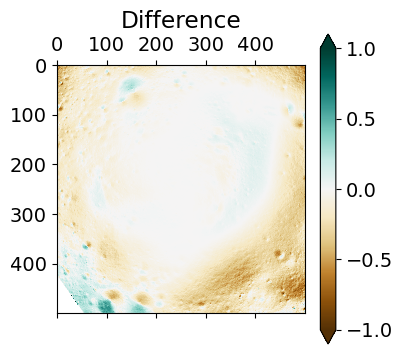

In [14]:
L1 = landmark.Landmark("output/polarstereo_moon_geotif.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/polarstereo_moon.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

## `render_ply.py`

Completely different renderer (C vs Blender API), so some small differences in value are expected

I'm using the gold standard landmark files to render with so that we are only comparing differences in the rendering code, not accumulated differences from the landmark creation and rendering code. 

In [15]:
!$BUILD_DIR/landmark_2_point \
-landmark gold_standard_data/UTM_WY.lmk \
-ply output/UTM_WY.ply \
-frame LOCAL

!python $PYTHON_SCRIPT_DIR/render_ply.py \
    output/UTM_WY.ply \
    30 120 \
    output/UTM_WY.png \
    -height 500 \
    -width 500 \
    -resolution 10

!$BUILD_DIR/add_srm \
  -input gold_standard_data/UTM_WY.lmk \
  -output output/UTM_WY_rendered.lmk \
  -srm output/UTM_WY.png

                 #! LVS Map v3.0
Landmark file saved at output/UTM_WY.ply
PLY import of 'UTM_WY.ply' took 58.61 ms
Fra:1 Mem:35.16M (Peak 35.16M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | UTM_WY
Fra:1 Mem:73.68M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:73.54M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:73.55M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:73.55M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:73.55M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:73.63M (Peak 77.49M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:73.63M (Peak 77.49M) | Time:00:00.01 | Mem:0

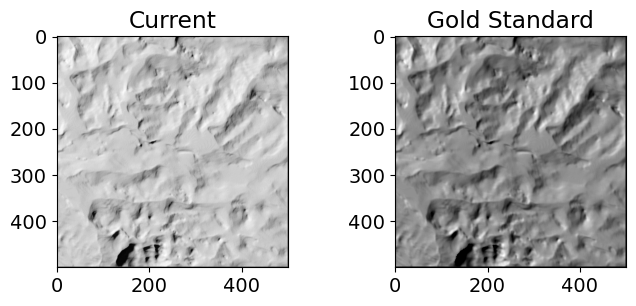

<Figure size 800x300 with 0 Axes>

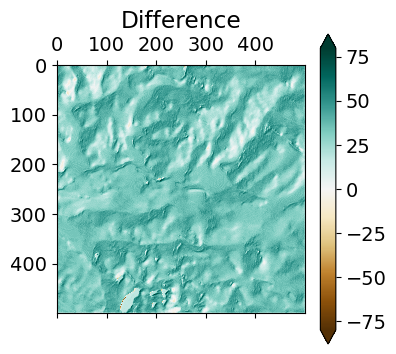

In [16]:
L1 = landmark.Landmark("output/UTM_WY_rendered.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.srm, cmap='gray')
plt.title("Current")

gt = landmark.Landmark("gold_standard_data/UTM_WY.lmk_demo.lmk")
plt.subplot(1,2,2)
plt.imshow(gt.srm, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.srm-gt.srm, cmap='BrBG', vmin=-80, vmax=80)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

##  `landmark_comparison`

I'm using the gold standard landmark files to compare with so that we are only comparing differences in the comparison code, not accumulated differences from the landmark creation, rendering, etc. 

In [17]:
!$BUILD_DIR/landmark_comparison \
  -l1 gold_standard_data/UTM_WY.lmk_demo.lmk \
  -l2 gold_standard_data/equal_rectangular_WY.lmk_demo.lmk \
  -o output/comparison 

No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
line = 0
num_matched_features 2209
i = 0 j = 0
best feat for homography 2209
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 1034
i = 0 j = 400
best feat for homography 1034
line = 200
num_matched_features 2397
i = 200 j = 0
best feat for homography 2397
num_matched_features 2599
i = 200 j = 200
best feat for homography 2599
num_matched_features 1121
i = 200 j = 400
best feat for homography 1121
line = 400
num_matched_features 1032
i = 400 j = 0
best feat for homography 1032
num_matched_features 1122
i = 400 j = 200
best feat for homography 1122
num_matched_features 485
i = 400 j = 400
best feat for homography 484
Saving results 

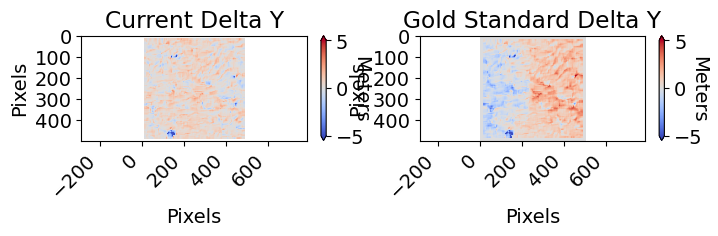

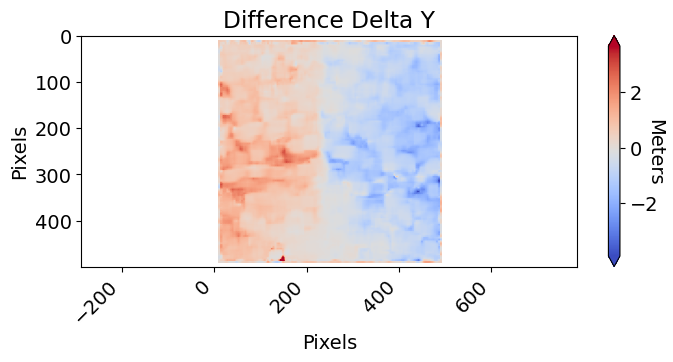

In [18]:
filepath1 = "output/comparison_delta_y_500by500.raw"
filepath2 = "gold_standard_data/comparison_delta_y_500by500.raw"
width = 500
height = 500

fig = plt.figure()
I = visualize_corr.readBinaryImage(filepath1, width, height)
mask = np.isnan(I)
visualize_corr.visualize_corr(I, "curr_delta_y", "Current Delta Y", mask, limits=[-5,5], fig=fig, ax=plt.subplot(2,2,1))

I2 = visualize_corr.readBinaryImage(filepath2, width, height)
mask = I2 == 0
visualize_corr.visualize_corr(I2, "gt_delta_y", "Gold Standard Delta Y", mask, limits=[-5,5], fig=fig, ax=plt.subplot(2,2,2))

visualize_corr.visualize_corr(I-I2, "diff_delta_y", "Difference Delta Y", mask)

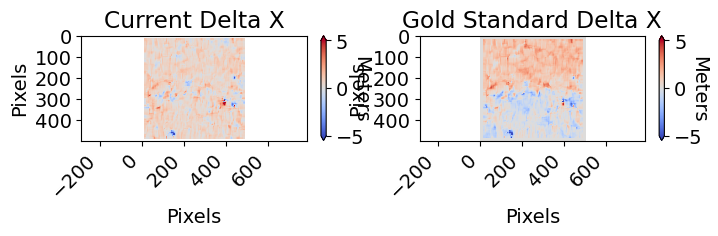

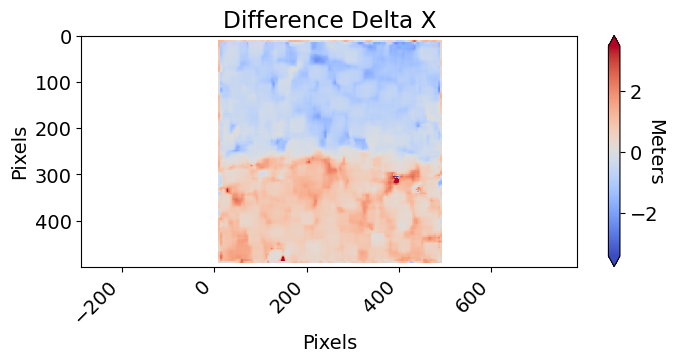

In [19]:
filepath1 = "output/comparison_delta_x_500by500.raw"
filepath2 = "gold_standard_data/comparison_delta_x_500by500.raw"
width = 500
height = 500

fig = plt.figure()
I = visualize_corr.readBinaryImage(filepath1, width, height)
mask = np.isnan(I)
visualize_corr.visualize_corr(I, "curr_delta_x", "Current Delta X", mask, limits=[-5,5], fig=fig, ax=plt.subplot(2,2,1))

I2 = visualize_corr.readBinaryImage(filepath2, width, height)
mask = I2 == 0
visualize_corr.visualize_corr(I2, "gt_delta_x", "Gold Standard Delta X", mask, limits=[-5,5], fig=fig, ax=plt.subplot(2,2,2))

visualize_corr.visualize_corr(I-I2, "diff_delta_x", "Difference Delta X", mask)

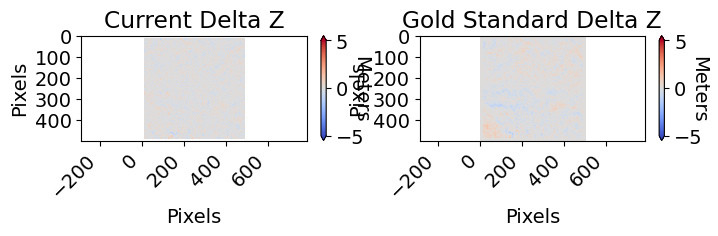

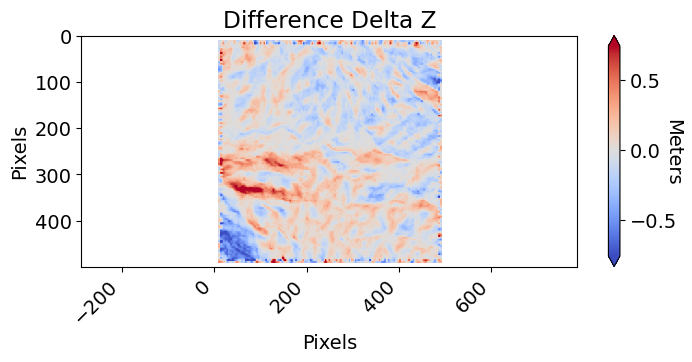

In [20]:
filepath1 = "output/comparison_delta_z_500by500.raw"
filepath2 = "gold_standard_data/comparison_delta_z_500by500.raw"
width = 500
height = 500

fig = plt.figure()
I = visualize_corr.readBinaryImage(filepath1, width, height)
mask = np.isnan(I)
visualize_corr.visualize_corr(I, "curr_delta_z", "Current Delta Z", mask, limits=[-5,5], fig=fig, ax=plt.subplot(2,2,1))

I2 = visualize_corr.readBinaryImage(filepath2, width, height)
mask = I2 == 0
visualize_corr.visualize_corr(I2, "gt_delta_z", "Gold Standard Delta Z", mask, limits=[-5,5], fig=fig, ax=plt.subplot(2,2,2))

visualize_corr.visualize_corr(I-I2, "diff_delta_z", "Difference Delta Z", mask)

## `point_to_landmark`

An elevation bias is expected because the point_2_landmark initializes the landmark tangent plane at the planetary radius instead of the elevation of the center point of the landmark

In [24]:
!$BUILD_DIR/point_2_landmark -p unit_test_data/final_3d_points.txt -l output/pointcloud.lmk -d 10 -lt -9.11089 -lg 15.3501 -s 100000 -sy 30000 -planet Moon -filetype POINT

Defaulting to WORLD
-0.264716360244713  0.964326318534754  0.000000000000000
 0.152696969557782  0.041916709338171  0.987383727314831
 0.952160114742634  0.261376626459640 -0.158345745234506
Landmark file saved at output/pointcloud.lmk


In [25]:
L1 = landmark.Landmark("output/pointcloud.lmk")
gt = landmark.Landmark("gold_standard_data/pointcloud_v3.lmk")

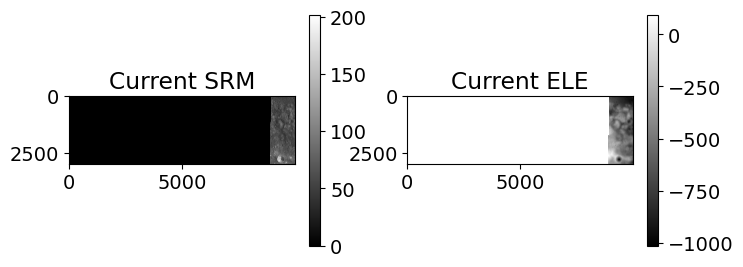

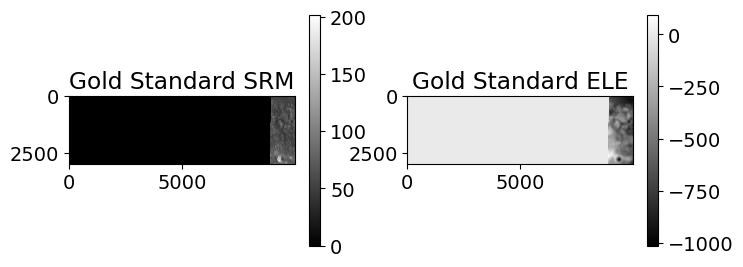

In [26]:
plt.subplot(1,2,1)
plt.imshow(L1.srm, cmap='gray')
plt.title("Current SRM")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(L1.ele, cmap='gray')
plt.title("Current ELE")
plt.colorbar()

plt.show()

plt.subplot(1,2,1)
plt.imshow(gt.srm, cmap='gray')
plt.title("Gold Standard SRM")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='gray')
plt.title("Gold Standard ELE")
plt.colorbar()

plt.show()

<Figure size 800x300 with 0 Axes>

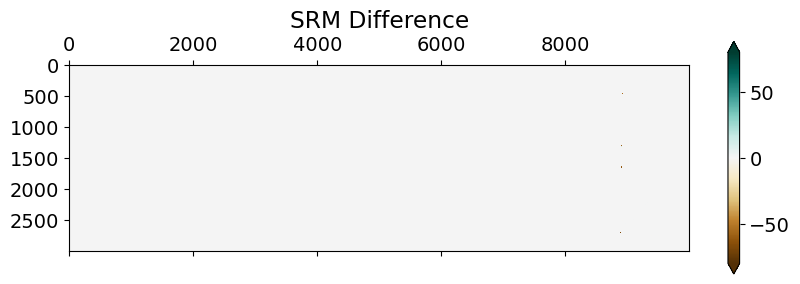

<Figure size 800x300 with 0 Axes>

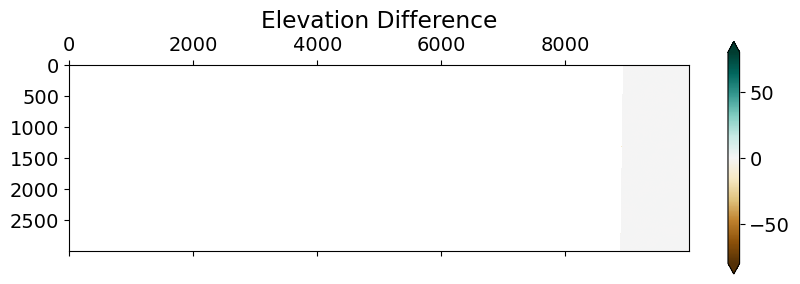

In [27]:
fig = plt.figure()
cax = plt.matshow(L1.srm-gt.srm, cmap='BrBG', vmin=-80, vmax=80)
cbar = fig.colorbar(cax, extend='both')
plt.title("SRM Difference")
plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-80, vmax=80)
cbar = fig.colorbar(cax, extend='both')
plt.title("Elevation Difference")
plt.show()